In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

eps = 1e-7

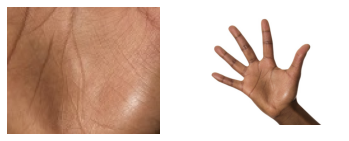

In [20]:
# 원본 영상
img_m = cv2.imread('model.jpg')
img_h = cv2.imread('hand.jpg')

plt.subplot(121)
plt.imshow(cv2.cvtColor(img_m,cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(122)
plt.imshow(cv2.cvtColor(img_h,cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

In [21]:
# 입력 영상의 2차원 H-S 히스토그램 계산

hsv_m = cv2.cvtColor(img_m, cv2.COLOR_BGR2HSV)
hsv_h = cv2.cvtColor(img_h, cv2.COLOR_BGR2HSV)

hist_m = cv2.calcHist([hsv_m],[0,1],None,[180,256],[0,180,0,256])
hist_h = cv2.calcHist([hsv_h],[0,1],None,[180,256],[0,180,0,256])

In [22]:
#히스토그램 정규화
print('hist_m.max()',hist_m.max())
print('hist_h.max()',hist_h.max())

print('hist_m.min()',hist_m.min())
print('hist_h.min()',hist_h.min())

print('------정규화 이후------')
hist_m = hist_m/img_m.size
hist_h = hist_h/img_h.size
print('hist_m.max()',hist_m.max())
print('hist_h.max()',hist_h.max())

print('hist_m.min()',hist_m.min())
print('hist_h.min()',hist_h.min())

# 비율 히스토그램 계산
print('------비율 히스토그램------')
hist_r = hist_m / (hist_h + eps) # zero-division err
hist_r = np.minimum(hist_r, 1.0)
print(hist_r.min(), hist_m.max())

hist_m.max() 256.0
hist_h.max() 128414.0
hist_m.min() 0.0
hist_h.min() 0.0
------정규화 이후------
hist_m.max() 0.007111111
hist_h.max() 0.22842312727686703
hist_m.min() 0.0
hist_h.min() 0.0
------비율 히스토그램------
0.0 0.007111111


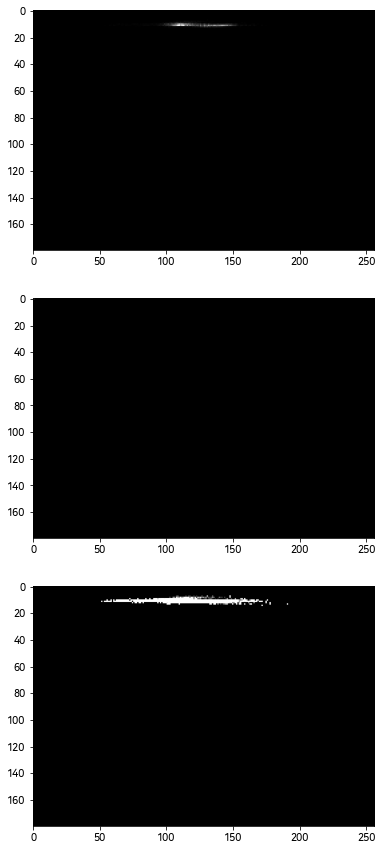

In [23]:
# 히스토그램 확인
plt.figure(figsize=(8,15))

plt.subplot(311)
plt.imshow(hist_m,cmap='gray')
plt.subplot(312)
plt.imshow(hist_h,cmap='gray')
plt.subplot(313)
plt.imshow(hist_r,cmap='gray')
plt.show()

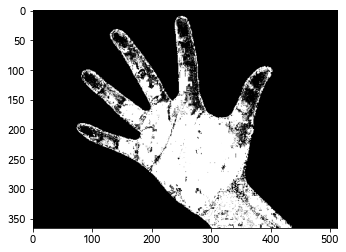

In [24]:
# 히스토그램 역투영 수행
out = np.zeros(hsv_h.shape[:2])

hist = [0]*256
h,w = hsv_h.shape[:2]

for x in range(w):
    for y in range(h):
        h1 = hsv_h[y][x][0]
        s1 = hsv_h[y][x][1]
        out[y][x]=hist_r[h1,s1]
plt.imshow(out,cmap='gray')

In [25]:
# # 히스토그램 역투영 수행, 이진화도 동시에
# out = np.zeros(hsv_h.shape[:2])

# hist = [0]*256
# h,w = hsv_h.shape[:2]
# threshold = 0.02 

# for x in range(w):
#     for y in range(h):
#         h1 = hsv_h[y][x][0]
#         s1 = hsv_h[y][x][1]
#         out[y][x]=hist_r[h1,s1]
#         if hist_r[h1,s1]>threshold:
#             out[y][x]=255
# plt.imshow(out,cmap='gray')

In [ ]:
#  이진화 수행
ret, thresholded = cv2.threshold(out,0.02,255,cv2.THRESH_BINARY)
plt.imshow(thresholded)
cv2.imwrite('result.jpg',thresholded)

True

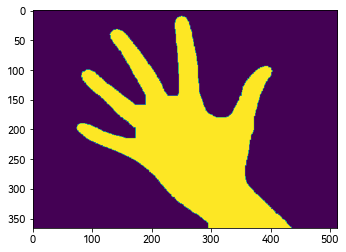

In [16]:
# 모폴로지 연산
def morph(input_, num_dilate, num_erode):
    for x in range(num_dilate):
        input_ = cv2.morphologyEx(input_, cv2.MORPH_DILATE, None)
    for x in range(num_erode):
        input_ = cv2.morphologyEx(input_, cv2.MORPH_ERODE, None)
    return input_


out = morph(thresholded,8,8)
plt.imshow(out)
cv2.imwrite('morphology.jpg',out)